Shape: (772, 31)

Data Types:
 Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: 

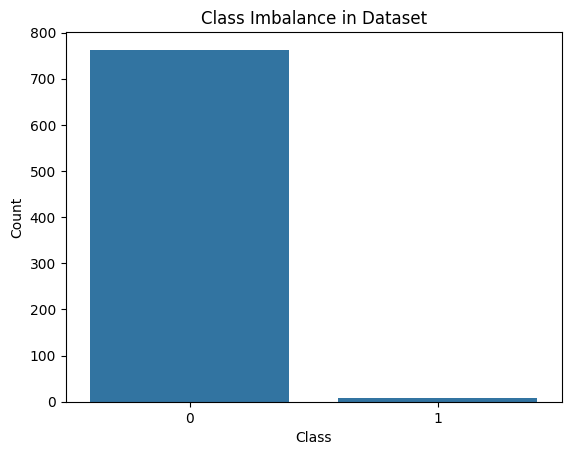


Duplicate rows: 7
Duplicates removed.

Statistical Summary:
             Time          V1          V2          V3          V4          V5  \
count  765.000000  765.000000  765.000000  765.000000  765.000000  765.000000   
mean   284.857516   -0.174935    0.211289    0.877483    0.280936   -0.007175   
std    171.463677    1.293200    1.174929    1.035273    1.262924    1.102495   
min      0.000000   -6.093248  -12.114213   -5.694973   -4.657545   -6.631951   
25%    130.000000   -0.895224   -0.182609    0.309867   -0.483154   -0.538265   
50%    284.000000   -0.378602    0.285832    0.907209    0.384451   -0.119566   
75%    433.000000    1.111048    0.885570    1.541254    1.126665    0.460941   
max    581.000000    1.586093    5.267376    3.772857    4.075817    7.672544   

               V6          V7          V8          V9  ...         V21  \
count  765.000000  765.000000  765.000000  765.000000  ...  765.000000   
mean     0.150284    0.126427   -0.059422   -0.032147  ...   

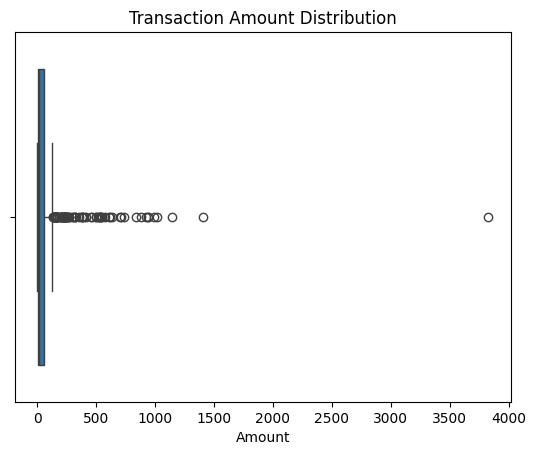

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("Creditcard_data.csv")

# 2. Basic inspection
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# 3. Check class distribution
class_counts = df['Class'].value_counts()
print("\nClass Distribution:\n", class_counts)

# Visualization of imbalance
plt.figure()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Imbalance in Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 4. Check duplicates
duplicates = df.duplicated().sum()
print("\nDuplicate rows:", duplicates)

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

# 5. Sort by time (IMPORTANT for time-ordered data)
df = df.sort_values(by='Time').reset_index(drop=True)

# 6. Basic statistical overview
print("\nStatistical Summary:")
print(df.describe())

# 7. Amount distribution (outlier awareness, not removal)
plt.figure()
sns.boxplot(x=df['Amount'])
plt.title("Transaction Amount Distribution")
plt.show()


In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

print("Before Balancing:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("After Balancing:", Counter(y_balanced))

# Create balanced DataFrame
df_balanced = pd.concat(
    [
        pd.DataFrame(X_balanced, columns=X.columns),
        pd.Series(y_balanced, name='Class')
    ],
    axis=1
)

print("\nBalanced Dataset Shape:", df_balanced.shape)


Before Balancing: Counter({0: 756, 1: 9})
After Balancing: Counter({0: 756, 1: 756})

Balanced Dataset Shape: (1512, 31)


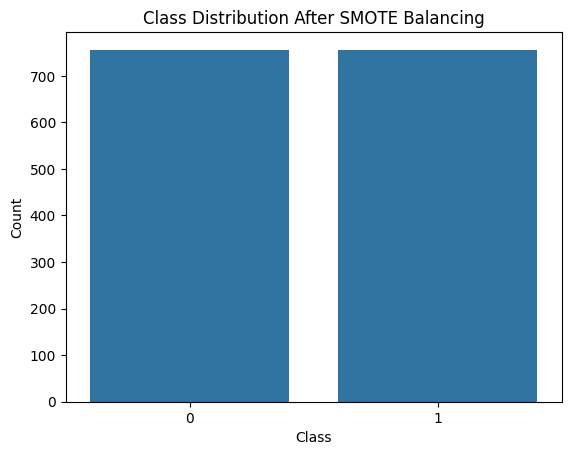

In [11]:
balanced_counts = df_balanced['Class'].value_counts()

plt.figure()
sns.barplot(x=balanced_counts.index, y=balanced_counts.values)
plt.title("Class Distribution After SMOTE Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [13]:
sample_random = df_balanced.sample(
    frac=0.8,
    random_state=42
).reset_index(drop=True)


In [14]:
X = df_balanced.drop(columns=['Class'])
y = df_balanced['Class']

X_strat, _, y_strat, _ = train_test_split(
    X,
    y,
    train_size=0.8,
    stratify=y,
    random_state=42
)

sample_stratified = pd.concat([X_strat, y_strat], axis=1).reset_index(drop=True)


In [15]:
# Drop target for clustering
X_cluster = df_balanced.drop(columns=['Class'])

# Create clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df_balanced['Cluster'] = kmeans.fit_predict(X_cluster)

# Randomly select clusters
selected_clusters = np.random.choice(
    df_balanced['Cluster'].unique(),
    size=3,
    replace=False
)

sample_cluster = df_balanced[
    df_balanced['Cluster'].isin(selected_clusters)
].drop(columns=['Cluster']).reset_index(drop=True)


In [16]:
sample_bootstrap = df_balanced.sample(
    n=len(df_balanced),
    replace=True,
    random_state=42
).reset_index(drop=True)


In [17]:
k = 5  # sampling interval
start = np.random.randint(0, k)

sample_systematic = df_balanced.iloc[start::k].reset_index(drop=True)


In [18]:
samples = {
    "Sampling1_SimpleRandom": sample_random,
    "Sampling2_Stratified": sample_stratified,
    "Sampling3_Cluster": sample_cluster,
    "Sampling4_Bootstrap": sample_bootstrap,
    "Sampling5_Systematic": sample_systematic
}

for name, sample in samples.items():
    print(name, sample.shape)


Sampling1_SimpleRandom (1210, 31)
Sampling2_Stratified (1209, 31)
Sampling3_Cluster (1024, 31)
Sampling4_Bootstrap (1512, 32)
Sampling5_Systematic (303, 32)


In [19]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42)
}

catboost_model = CatBoostClassifier(verbose=0, random_state=42)



cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


results_matrix = pd.DataFrame(
    index=list(models.keys()) + ["CatBoost"],
    columns=samples.keys()
)



for sampling_name, sample_df in samples.items():

    X = sample_df.drop(columns=["Class"]).values
    y = sample_df["Class"].values

    # sklearn-compatible models
    for model_name, model in models.items():
        scores = cross_val_score(
            model,
            X,
            y,
            cv=cv,
            scoring="accuracy",
            n_jobs=-1
        )
        results_matrix.loc[model_name, sampling_name] = scores.mean()

    # CatBoost (manual CV)
    cat_scores = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        catboost_model.fit(X_train, y_train)
        y_pred = catboost_model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cat_scores.append(acc)

    results_matrix.loc["CatBoost", sampling_name] = np.mean(cat_scores)


results_matrix = results_matrix.astype(float).round(4)
print("\nFinal Accuracy Matrix:\n")
print(results_matrix)

results_matrix.to_csv("sampling_model_accuracy_matrix.csv")



Final Accuracy Matrix:

              Sampling1_SimpleRandom  Sampling2_Stratified  Sampling3_Cluster  \
RandomForest                  0.9959                0.9917             0.9961   
ExtraTrees                    0.9975                0.9975             0.9990   
LightGBM                      0.9934                0.9917             0.9932   
XGBoost                       0.9893                0.9868             0.9844   
CatBoost                      0.9942                0.9909             0.9922   

              Sampling4_Bootstrap  Sampling5_Systematic  
RandomForest               0.9967                0.9900  
ExtraTrees                 0.9980                0.9933  
LightGBM                   0.9954                0.9834  
XGBoost                    0.9934                0.9636  
CatBoost                   0.9954                0.9736  


In [20]:
# ==========================================
# ARTIFACT GENERATION FOR README
# ==========================================

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 0. Create embeddings directory
# -------------------------------

EMBED_DIR = "embeddings"
os.makedirs(EMBED_DIR, exist_ok=True)

# -------------------------------
# 1. Class Imbalance (Before SMOTE)
# -------------------------------

plt.figure(figsize=(6, 4))
df["Class"].value_counts().plot(kind="bar")
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{EMBED_DIR}/class_distribution_before_smote.png")
plt.close()

# -------------------------------
# 2. Class Distribution (After SMOTE)
# -------------------------------

plt.figure(figsize=(6, 4))
df_balanced["Class"].value_counts().plot(kind="bar")
plt.title("Class Distribution After SMOTE Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{EMBED_DIR}/class_distribution_after_smote.png")
plt.close()

# -------------------------------
# 3. Amount Distribution
# -------------------------------

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Amount"])
plt.title("Transaction Amount Distribution")
plt.tight_layout()
plt.savefig(f"{EMBED_DIR}/amount_distribution.png")
plt.close()

# -------------------------------
# 4. Save Accuracy Matrix (CSV)
# -------------------------------

results_matrix.to_csv(
    f"{EMBED_DIR}/sampling_model_accuracy_matrix.csv"
)

# -------------------------------
# 5. Accuracy Heatmap (PNG)
# -------------------------------

plt.figure(figsize=(10, 6))
sns.heatmap(
    results_matrix,
    annot=True,
    fmt=".4f",
    cmap="YlGnBu"
)
plt.title("Accuracy Matrix: Sampling Techniques vs Models")
plt.xlabel("Sampling Techniques")
plt.ylabel("Models")
plt.tight_layout()
plt.savefig(f"{EMBED_DIR}/accuracy_heatmap.png")
plt.close()

# -------------------------------
# 6. Global Sampling Performance (Mean Accuracy)
# -------------------------------

sampling_mean = results_matrix.mean(axis=0).sort_values(ascending=False)

sampling_mean.to_csv(
    f"{EMBED_DIR}/sampling_mean_accuracy.csv"
)

plt.figure(figsize=(8, 4))
sampling_mean.plot(kind="bar")
plt.title("Average Accuracy per Sampling Technique")
plt.xlabel("Sampling Technique")
plt.ylabel("Mean Accuracy")
plt.tight_layout()
plt.savefig(f"{EMBED_DIR}/sampling_mean_accuracy.png")
plt.close()

# -------------------------------
# 7. Optional: Dump Summary TXT
# -------------------------------

with open(f"{EMBED_DIR}/summary.txt", "w") as f:
    f.write("Sampling Mean Accuracy (Descending):\n\n")
    f.write(sampling_mean.to_string())

print("✅ All artifacts generated successfully in /embeddings")


✅ All artifacts generated successfully in /embeddings


In [21]:
import matplotlib.pyplot as plt

# Recompute sampling_mean safely
sampling_mean = results_matrix.mean(axis=0)

# Plot
plt.figure(figsize=(8, 4))
sampling_mean.plot(kind="bar")

plt.ylim(0.98, 1.0)   # zoomed y-axis for visibility
plt.ylabel("Mean Accuracy")
plt.xlabel("Sampling Technique")
plt.title("Average Accuracy per Sampling Technique (Zoomed View)")

plt.tight_layout()
plt.savefig("embeddings/sampling_mean_accuracy.png", dpi=200)
plt.close()

print("sampling_mean_accuracy.png regenerated with zoomed y-axis.")


sampling_mean_accuracy.png regenerated with zoomed y-axis.
